In [1]:
import sys, os
import numpy as np
rootdir = '../../..'
sys.path.append(rootdir)
from modules.hyperparam.kitti_aggregate_gt_transforms import (
    hyperparam_out_dir, filename_aggregated_transforms, filename_transforms_statistics, filename_class_instance_count)
from modules.dataset_utils.kitti_dataset_utils.constants import _IDX_TO_OBJ_CLASS_
from modules.hyperparam.bdd_aggregate_gt_transforms import load_data_json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
aggregated_transforms_filepath = os.path.join(rootdir, hyperparam_out_dir, filename_aggregated_transforms)
transforms_statictics_filepath = os.path.join(rootdir, hyperparam_out_dir, filename_transforms_statistics)
class_instance_count_filepath = os.path.join(rootdir, hyperparam_out_dir, filename_class_instance_count)

aggregated_transforms = load_data_json(aggregated_transforms_filepath)
transforms_statictics = load_data_json(transforms_statictics_filepath)
class_instance_count = load_data_json(class_instance_count_filepath)

In [3]:
for (class_id, class_name) in _IDX_TO_OBJ_CLASS_.items():
    print(f'number of instance for class {class_name}: {class_instance_count[str(class_id)]}')
print('mean: ', transforms_statictics['mean'])
print('std: ', transforms_statictics['std'])

number of instance for class vehicle: 4825607
number of instance for class person: 1556527
number of instance for class DontCare: 0
mean:  [3.923069953918457, 3.733052968978882, 3.922192335128784, 3.6863183975219727]
std:  [0.9127615690231323, 0.8123767375946045, 0.9082130789756775, 0.808856189250946]


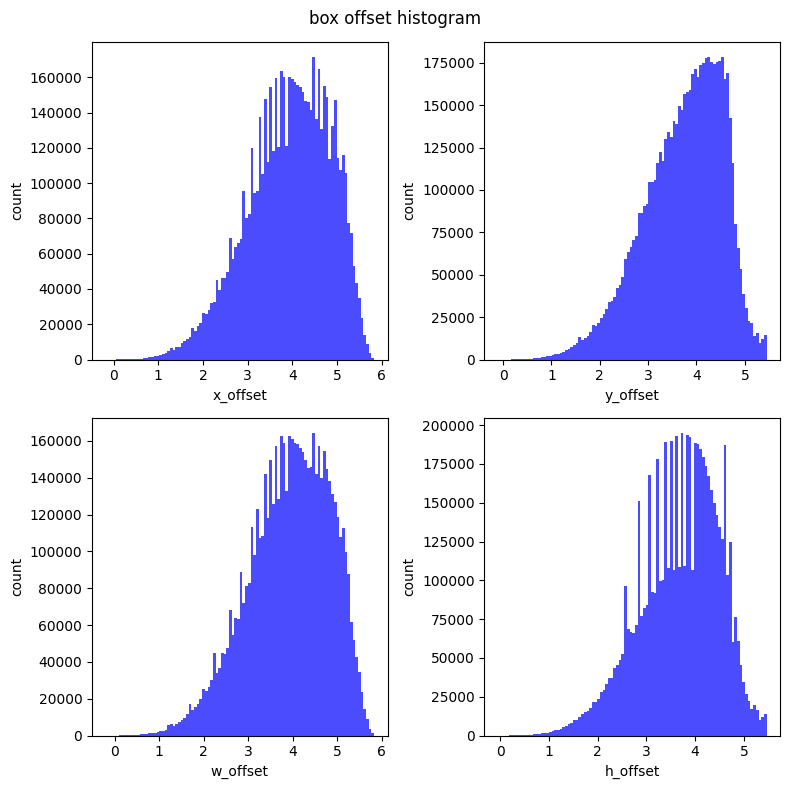

In [4]:
def plot_offset_histogram(aggregated_transforms, nbins, figsize):
    import numpy as np
    aggregated_transforms_np = np.array(aggregated_transforms)
    dx = aggregated_transforms_np[:,0]
    dy = aggregated_transforms_np[:,1]
    dw = aggregated_transforms_np[:,2]
    dh = aggregated_transforms_np[:,3]

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=figsize)
    ax[0,0].hist(dx, nbins, color='blue', alpha=0.7)
    ax[0,0].set_xlabel('x_offset')
    ax[0,0].set_ylabel('count')

    ax[0,1].hist(dy, nbins, color='blue', alpha=0.7)
    ax[0,1].set_xlabel('y_offset')
    ax[0,1].set_ylabel('count')

    ax[1,0].hist(dw, nbins, color='blue', alpha=0.7)
    ax[1,0].set_xlabel('w_offset')
    ax[1,0].set_ylabel('count')

    ax[1,1].hist(dh, nbins, color='blue', alpha=0.7)
    ax[1,1].set_xlabel('h_offset')
    ax[1,1].set_ylabel('count')

    plt.suptitle('box offset histogram')
    plt.tight_layout()
    plt.show()


plot_offset_histogram(aggregated_transforms, nbins=100, figsize=(8, 8))

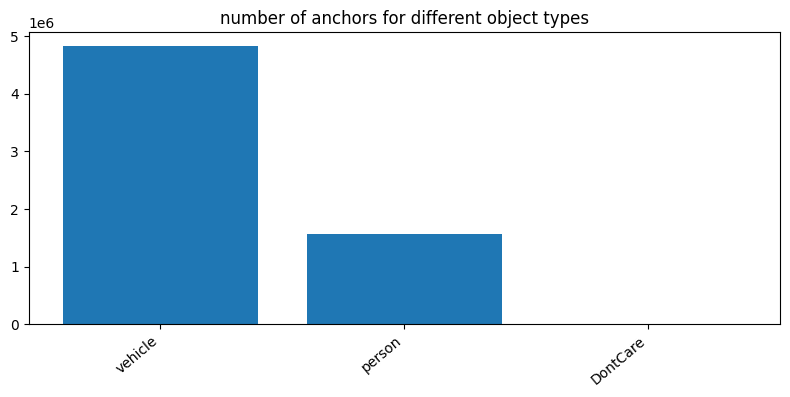

In [5]:
def plot_categorical_data(data, figsize=(8, 4)):
    keys = [ _IDX_TO_OBJ_CLASS_[int(class_id)] for class_id in data.keys()]
    vals = np.array(list(data.values()))
    
    sorted_idx = np.argsort(vals)[::-1]
    vals = vals[sorted_idx]
    keys = [keys[sorted_idx[i]] for i in range(sorted_idx.shape[0])]
    
    plt.figure(figsize=figsize)
    plt.bar(keys, vals)
    plt.xticks(rotation=40, ha='right')
    plt.tight_layout()
    plt.title('number of anchors for different object types')
    plt.show()


plot_categorical_data(class_instance_count, figsize=(8, 4))